# Day19 || Understanding Your data

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('train.csv')

### 1. How Big is the data?

In [20]:
df.shape

(891, 12)

### 2. How does data look like?

In [21]:
df.head() # use this for more efficient it give me random data df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. what is the data types of cols?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 4. Are their any missing values?

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 5. How does the data look mathematically?

In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 6. Are their duplicates values?

In [25]:
df.duplicated().sum()

np.int64(0)

### 7. How is the correlation between cols?

In [28]:
df.corr(numeric_only=True)['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# Day20 || EDA Univariate Analysis

Analysis on single column data is called Univariate data analysis

Data are two types 
Numerical Data = Number related data(age)
Categorical Data = Data related to variable(city, country,gender)


In [32]:
import seaborn as sns
import pandas as pd

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Categorical data

### a. Countplot

In [ ]:
sns.countplot(df['Survived'])
# Seaborn interprets the first argument as x=None, data=df['Survived'].
#Internally, it tries to iterate over the Series, which can sometimes create multiple bars incorrectly if the argument parsing is off.

Survived
0    549
1    342
Name: count, dtype: int64

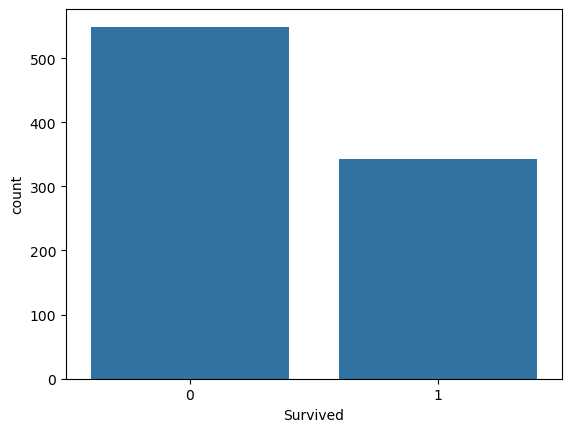

In [37]:
sns.countplot(x='Survived', data=df)
df['Survived'].value_counts()

### b. Piecharts

<Axes: ylabel='count'>

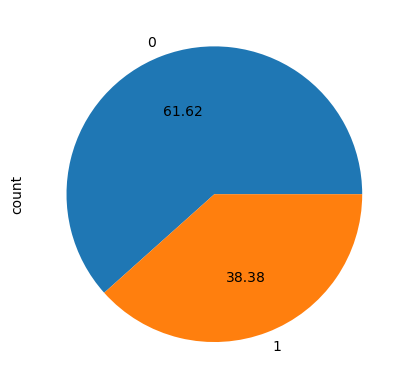

In [40]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

## Numerical Data

### a. Histogram

In [41]:
import matplotlib.pyplot as plt

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

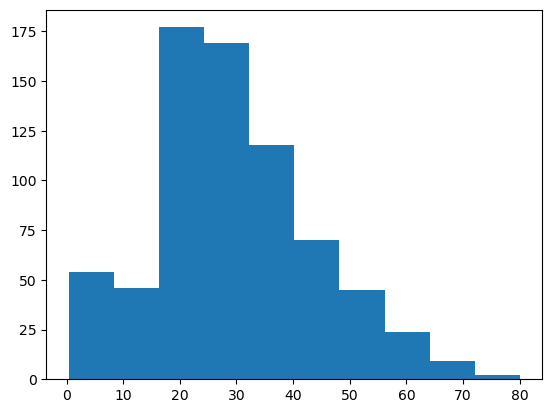

In [43]:
plt.hist(df['Age']) #plt.hist(df['Age'],bins=5) this is used to refer the size of graph

### b. Distplot

C:\Users\Prashant Mishra\AppData\Local\Temp\ipykernel_3748\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

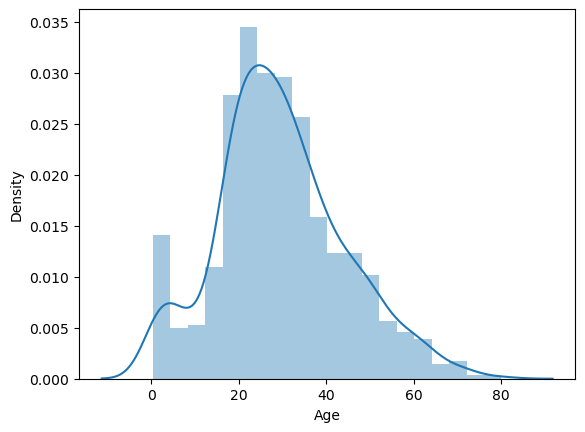

In [44]:
sns.distplot(df['Age'])

### c. Boxplot

<Axes: ylabel='Fare'>

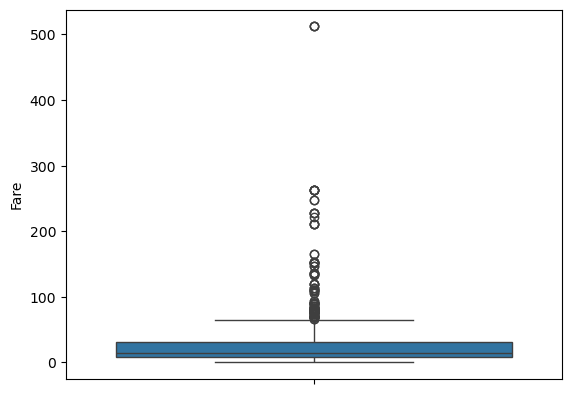

In [45]:
sns.boxplot(df['Fare'])

In [46]:
df['Age'].min()

0.42

In [47]:
df['Age'].max()

80.0

In [48]:
df['Age'].mean()

np.float64(29.69911764705882)

In [49]:
df['Age'].skew()

np.float64(0.38910778230082704)

mormal distribution and types of distribution

# Day21 || EDA using Bivariate and Multivariate Analysis

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
tips = pd.read_csv('tip.csv')

In [5]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [6]:
titanic = pd.read_csv('train.csv')

In [7]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [58]:
fly = pd.read_csv('AirPassengers.csv')

In [59]:
fly.head(1)

,Month,#Passengers
0,1949-01,112


In [10]:
iris = pd.read_csv('iris.csv')

In [11]:
iris.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa


## 1. Scatterplot(Numerical - Numerical)

scatterplot() takes from 0 to 1 positional arguments but 2 were given
means that you passed two positional arguments to the scatterplot() function, but the function doesn't accept them in that way.

<Axes: xlabel='total_bill', ylabel='tip'>

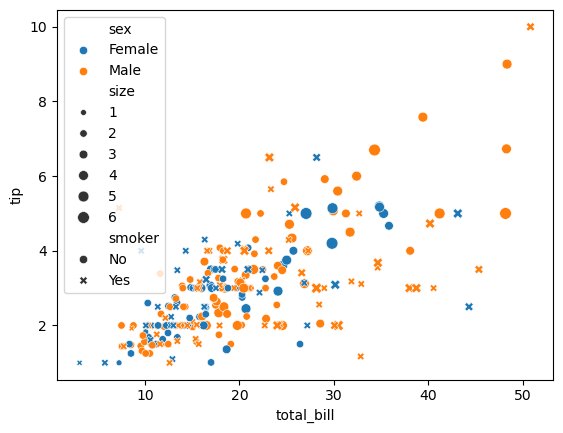

In [12]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker'],size=tips['size']) #huw is additional parameter to the scatterplot to give me you additional infomation

## 2. Bar - plot(Numerical - Categorical)

generally 
x axis = Categorical Data
y axis = Numerical Data

In [14]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

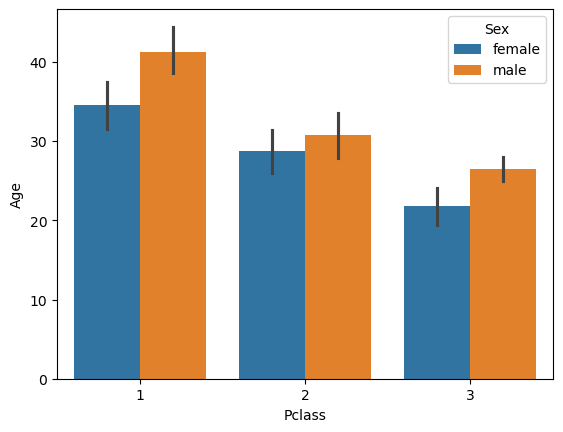

In [20]:
sns.barplot(x = titanic['Pclass'],y = titanic['Age'],hue=titanic['Sex'])

Black line show confidence interval part of statics

## 3. Box Plot(Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

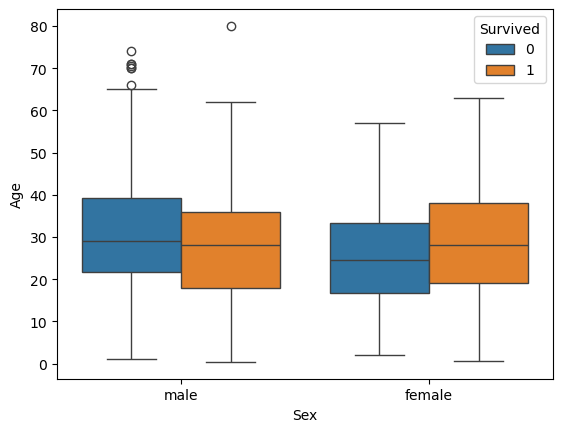

In [22]:
sns.boxplot(x = titanic['Sex'],y = titanic['Age'],hue = titanic['Survived'])

## 4. Distplot(Numerical - Categorical)

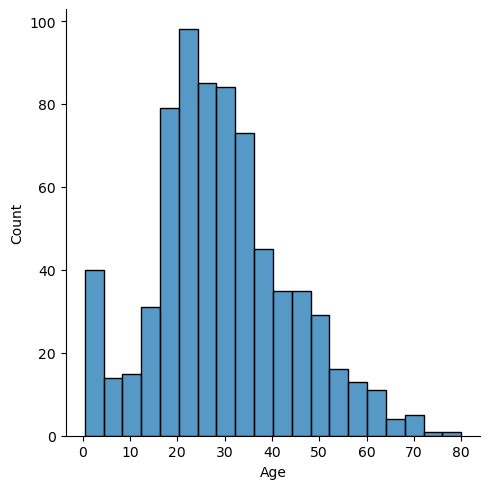

In [23]:
sns.displot(titanic['Age'])

The issue is because sns.distplot() has been deprecated in Seaborn (from version 0.11 onward) and removed in recent versions. That’s why your code is failing.
✅ Why It’s Not Running:
Seaborn removed distplot() and recommends using histplot() or kdeplot() instead.
✅ How to Fix It:
Replace sns.distplot() with sns.histplot() (or sns.kdeplot() if you only want the KDE curve).

<Axes: xlabel='Age', ylabel='Count'>

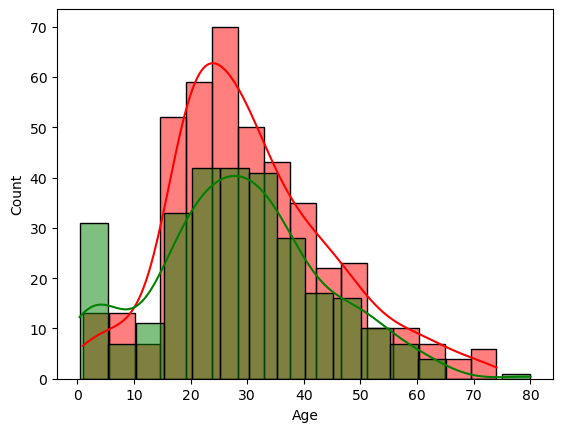

In [26]:
sns.histplot(titanic[titanic['Survived']==0]['Age'], kde=True, color="red", label="Not Survived")
sns.histplot(titanic[titanic['Survived']==1]['Age'], kde=True, color="green", label="Survived")

## 5. HeatMap(Categorical - Categorical)

<Axes: xlabel='Survived', ylabel='Pclass'>

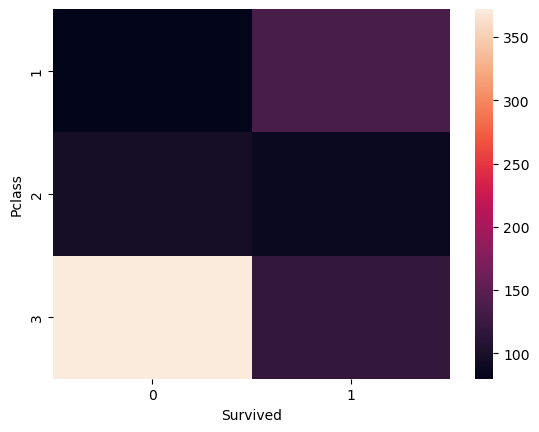

In [28]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

<Axes: xlabel='Pclass'>

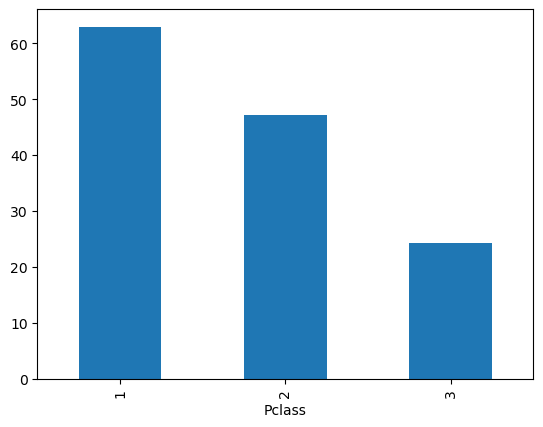

In [38]:
(titanic.groupby('Pclass')['Survived'].mean()*100).plot(kind='bar')

In [39]:
titanic.groupby('Sex')['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

## 6. ClusterMap(Categorical - Categorical)

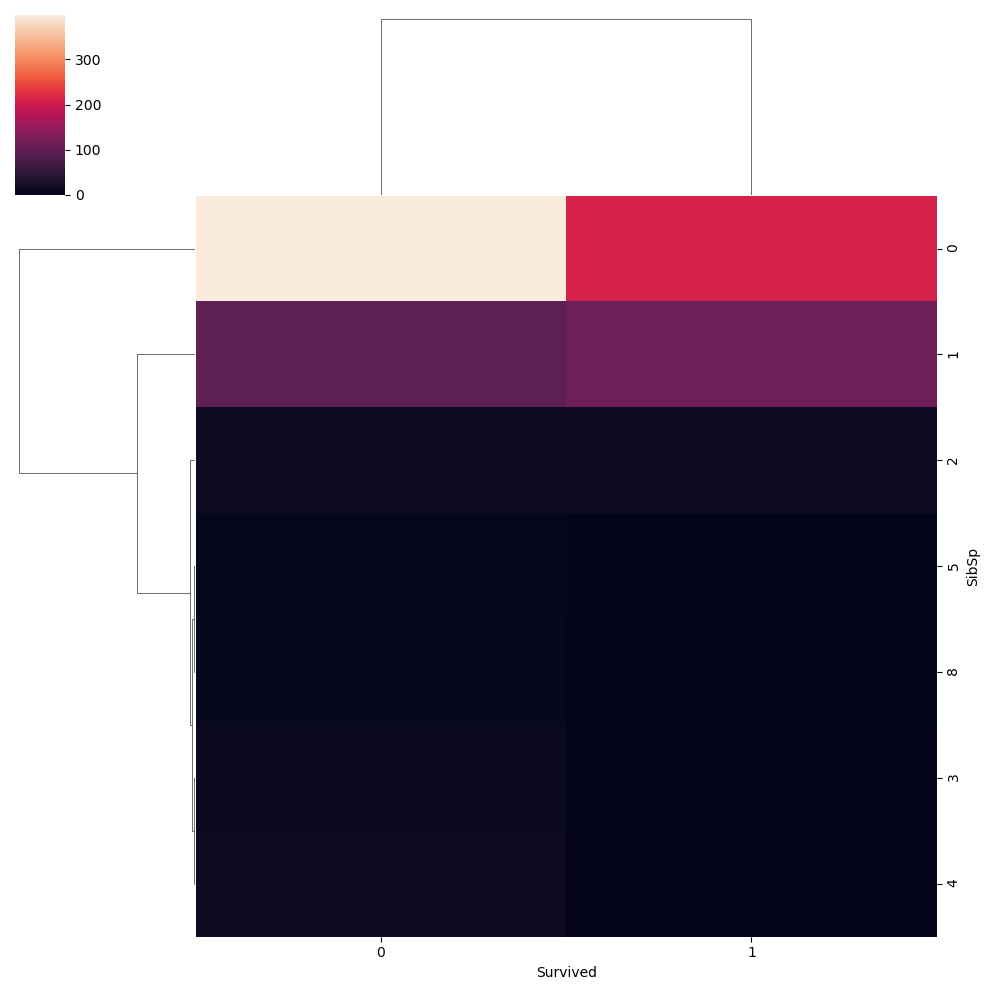

In [41]:
sns.clustermap(pd.crosstab(titanic['SibSp'],titanic['Survived']))

Define closeness between values
the black color pencil line call dendogram it capture the hierachial relationship between data

## 7. Pairplot

it is the collection of scatterplot
for multiple numerical column relation to multiple numerical column relationship

In [42]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


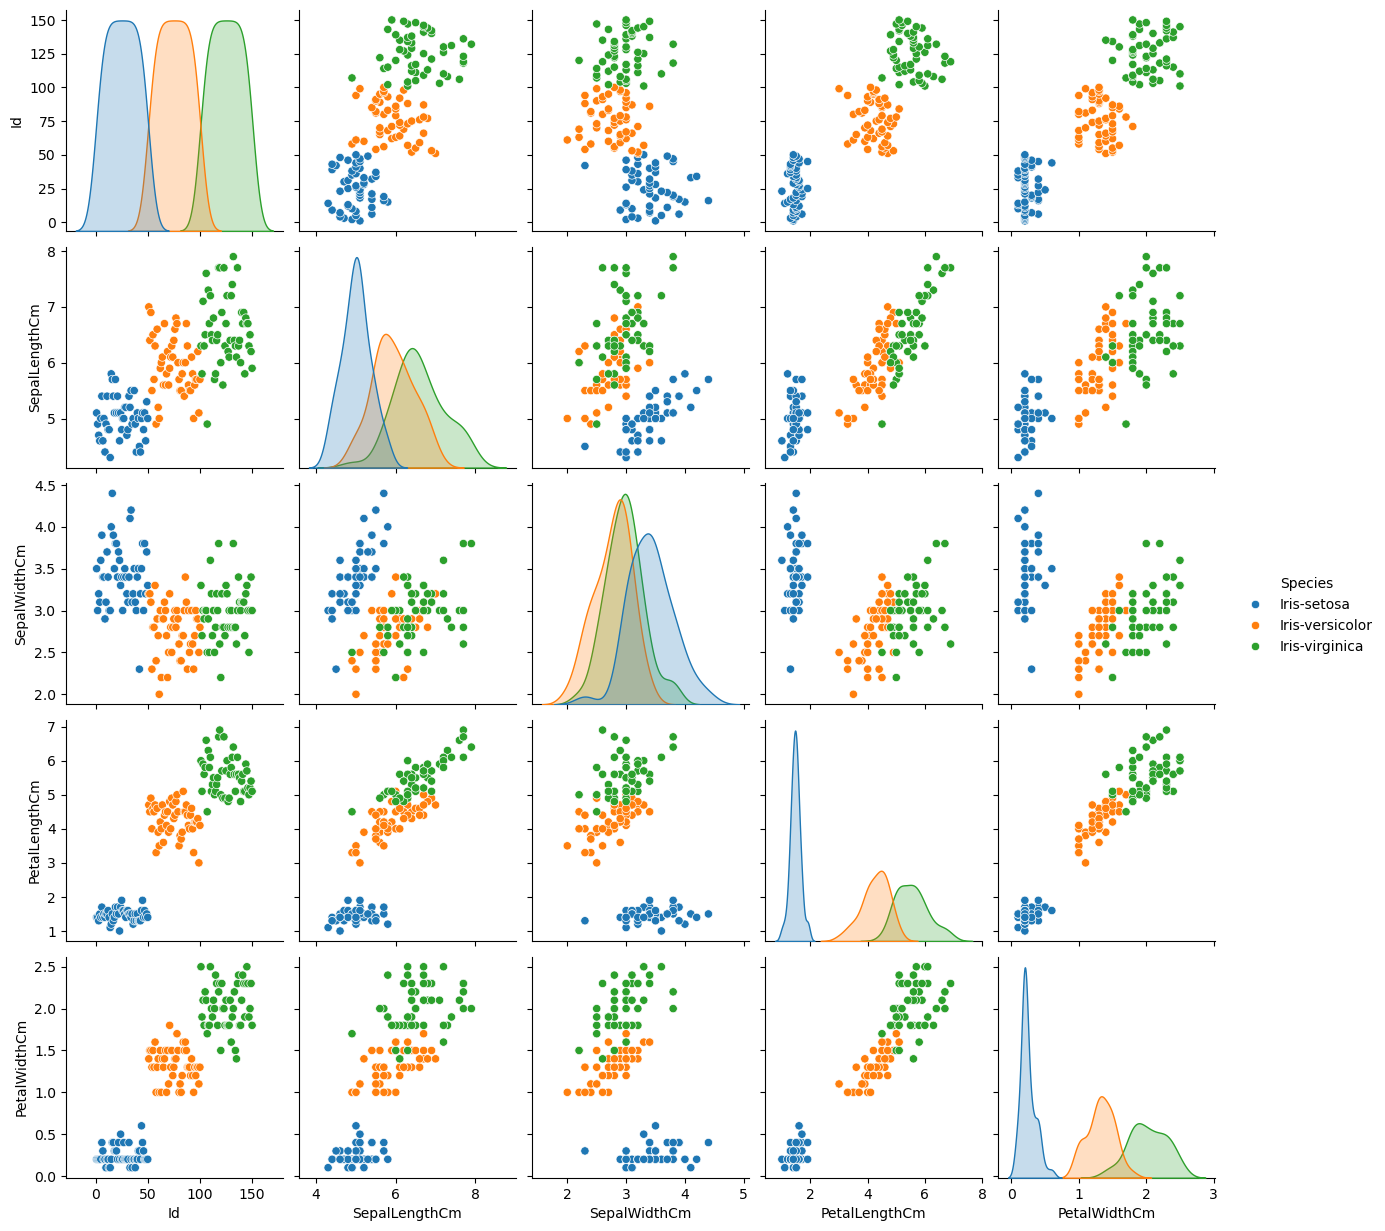

In [44]:
sns.pairplot(iris,hue='Species')

## 8. Lineplot(Numerical -Numerical)

In [60]:
fly.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [63]:
fly['Month'] = pd.to_datetime(fly['Month'])

In [64]:
fly['Month_Name'] = fly['Month'].dt.month_name()
fly['Year'] = fly['Month'].dt.year

In [65]:
fly.head()

,Month,#Passengers,Month_Name,Year
0,1949-01-01,112,January,1949
1,1949-02-01,118,February,1949
2,1949-03-01,132,March,1949
3,1949-04-01,129,April,1949
4,1949-05-01,121,May,1949


In [72]:
new = fly.groupby('Year')['#Passengers'].sum().reset_index()

<Axes: xlabel='Year', ylabel='#Passengers'>

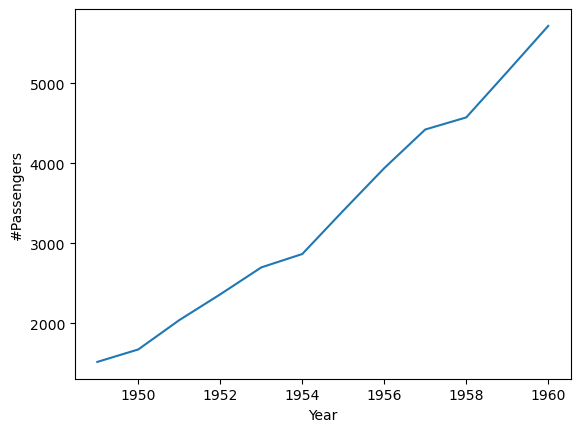

In [73]:
sns.lineplot(x = new['Year'],y = new['#Passengers'])

### Heatmap example on this

In [75]:
fly.pivot_table(values='#Passengers',index='Month_Name',columns='Year')

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month_Name,,,,,,,,,,,,
April,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
August,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
December,118.0,140.0,166.0,194.0,201.0,229.0,278.0,306.0,336.0,337.0,405.0,432.0
February,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
January,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
July,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
June,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
March,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0


<Axes: xlabel='Year', ylabel='Month_Name'>

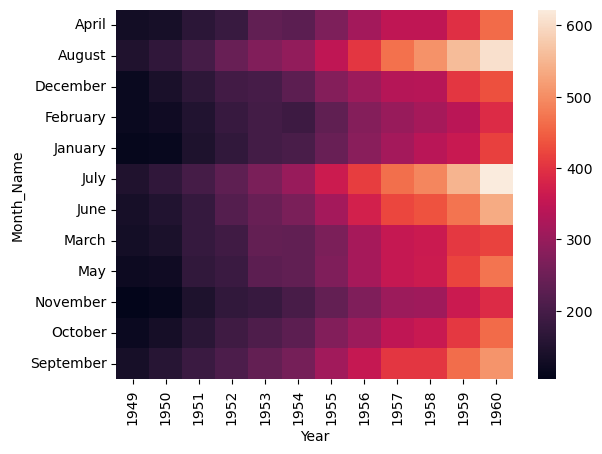

In [76]:
sns.heatmap(fly.pivot_table(values='#Passengers',index='Month_Name',columns='Year'))

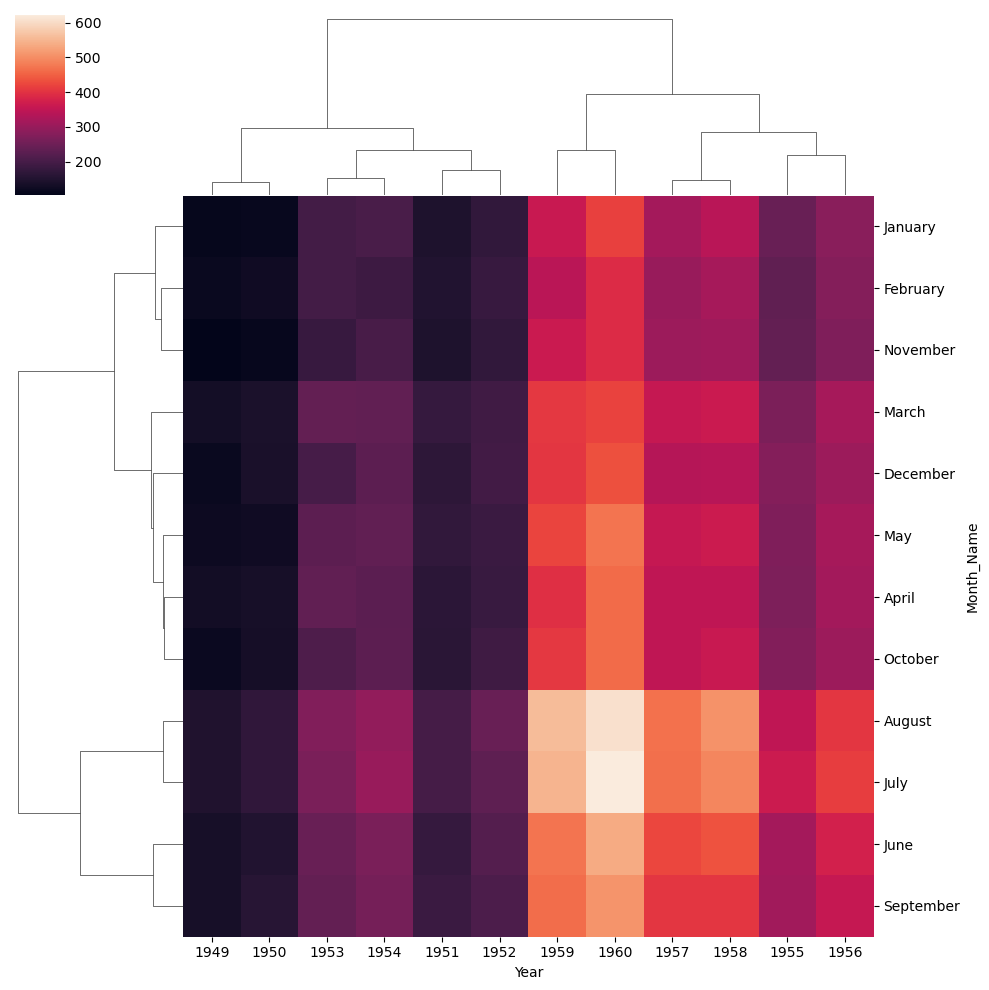

In [77]:
sns.clustermap(fly.pivot_table(values='#Passengers',index='Month_Name',columns='Year'))

# Day 22 || Pandas Profiling

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
